1. (40,7)
2. (20,5)
3. (10,3)

In [25]:
!pip install community
!pip install python-louvain

In [26]:
import numpy as np
import pandas as pd
import networkx as nx
import math
import matplotlib.pyplot as plt


#generating grapghs
def graph_edges(n,k):
  edges_list=[]
  adj_list=[[] for i in range(n)]
  adj_list.append([])
  for i in range(1,n):
    for j in range(i+1,n+1):
      if (i%k)!=(j%k) :
        edges_list.append((i,j))
        adj_list[i].append(j)
        adj_list[j].append(i)
  return edges_list,adj_list


#finding clique
def find_clique(n,k):
  clique={}
  d=int (n/k)
  r=n%k
  x=r
  y=k-r
  for i in range(1,k+1):
    count=0
    for j in range(min(x,i)+1):
      if y<(i-j):
        continue
      else:
        count=count+ math.comb(x,j)*math.pow(d+1,j)*math.comb(y,i-j)*math.pow(d,i-j)

    clique[i]=count
  clique[k+1]=0
  return clique

Generating the graphs and visualizing them with Network-x

3. (10,3)

[(1, 2), (1, 3), (1, 5), (1, 6), (1, 8), (1, 9), (2, 3), (2, 4), (2, 6), (2, 7), (2, 9), (2, 10), (3, 4), (3, 5), (3, 7), (3, 8), (3, 10), (4, 5), (4, 6), (4, 8), (4, 9), (5, 6), (5, 7), (5, 9), (5, 10), (6, 7), (6, 8), (6, 10), (7, 8), (7, 9), (8, 9), (8, 10), (9, 10)]
[[], [2, 3, 5, 6, 8, 9], [1, 3, 4, 6, 7, 9, 10], [1, 2, 4, 5, 7, 8, 10], [2, 3, 5, 6, 8, 9], [1, 3, 4, 6, 7, 9, 10], [1, 2, 4, 5, 7, 8, 10], [2, 3, 5, 6, 8, 9], [1, 3, 4, 6, 7, 9, 10], [1, 2, 4, 5, 7, 8, 10], [2, 3, 5, 6, 8, 9]]


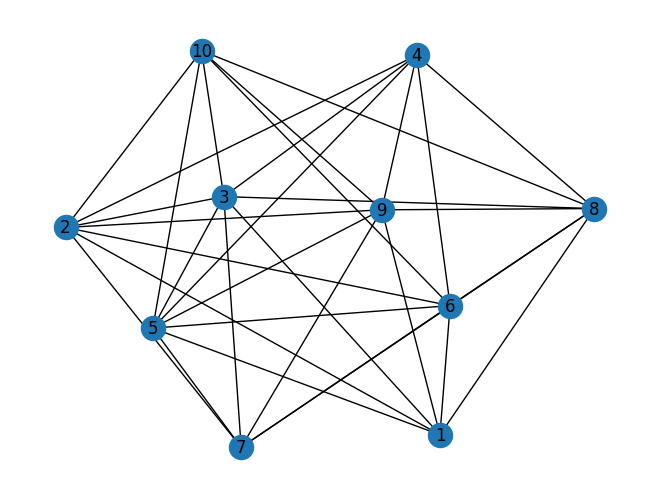

In [27]:
#3. (10,3)
n=10
k=3
edges_list,adj_list=graph_edges(n,k)
print(edges_list)
print(adj_list)
df=pd.DataFrame(edges_list,columns=['Source','Target'])
df.to_csv("edges(10,3).csv",index=False)

G=nx.Graph()
G.add_nodes_from([1,10])
G.add_edges_from(edges_list)
nx.draw(G,with_labels=True)


calculate the number of edges present in it & compare it with the approximation offered by the fraction(k-1)/k for the following values of n & k

In [28]:
possible_edges=n*(n-1)/2
present_edges=len(edges_list)
print("total possible edges : " ,possible_edges)
print("number of present edges : ",present_edges)
print()
print("Fraction of Present Edges : " , present_edges/possible_edges)
print("approximation offered by the fraction (k-1)/k : ",(k-1)/k)

total possible edges :  45.0
number of present edges :  33

Fraction of Present Edges :  0.7333333333333333
approximation offered by the fraction (k-1)/k :  0.6666666666666666


 Count the number of cliques of each size... Plot their histograms

{1: 10.0, 2: 33.0, 3: 36.0, 4: 0}


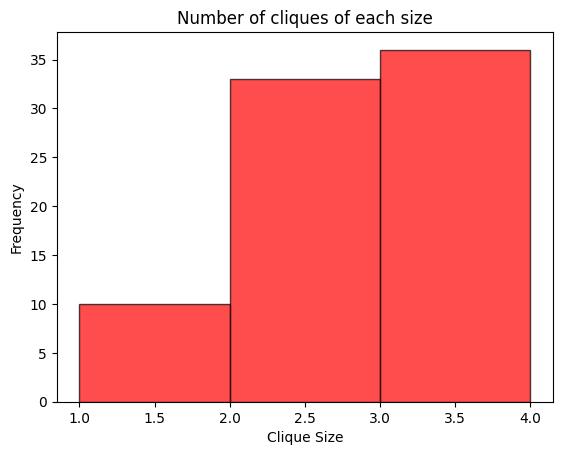

In [29]:
clique=find_clique(n,k)
print(clique)

plt.hist(clique.keys(),weights=clique.values(),bins=k,edgecolor='black',color='red',alpha=0.7)
plt.xlabel("Clique Size")
plt.ylabel("Frequency")
plt.title("Number of cliques of each size")
plt.show()

Identify the main communities in the graphs generated

In [30]:
import networkx as nx
import community.community_louvain as community_louvain


# Apply Louvain Community Detection
partition = community_louvain.best_partition(G)
print(partition)

# Group nodes by community
communities = {}
for node, comm in partition.items():
    communities.setdefault(comm, []).append(node)

print("Communities:", communities)


{1: 0, 10: 0, 2: 0, 3: 0, 5: 0, 6: 0, 8: 0, 9: 0, 4: 0, 7: 0}
Communities: {0: [1, 10, 2, 3, 5, 6, 8, 9, 4, 7]}


In [31]:
from networkx.algorithms.community import girvan_newman

com=list(girvan_newman(G))
com=list(com[0])
print("Communities",com)

Communities [{1}, {2, 3, 4, 5, 6, 7, 8, 9, 10}]


Generating the graphs and visualizing them with Network-x

1. (40,7)

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 37), (1, 38), (1, 39), (1, 40), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29), (2, 31), (2, 32), (2, 33), (2, 34), (2, 35), (2, 36), (2, 38), (2, 39), (2, 40), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 25), (3, 26), (3, 27), (3, 28), (3, 29), (3, 30), (3, 32), (3, 33), (3, 34), (3, 35), (3, 36), (3, 37), (3, 39), (3, 40), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 19), (4, 20), (4, 21

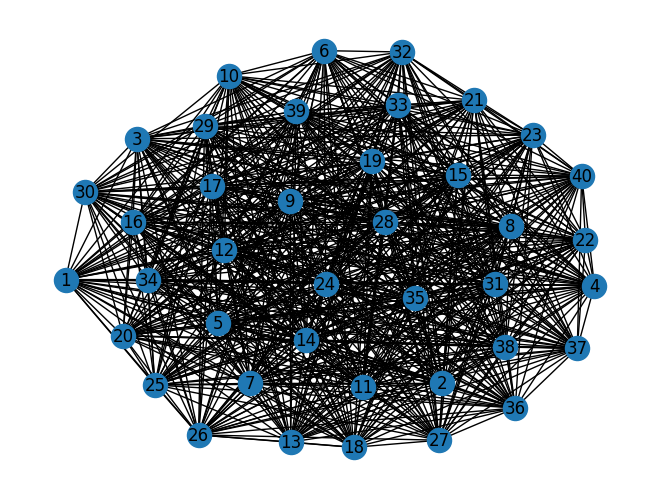

In [32]:
#1. (40,7)
n=40
k=7
edges_list,adj_list=graph_edges(n,k)
print(edges_list)
print("number of edges : ",len(edges_list))
print(adj_list)
df=pd.DataFrame(edges_list,columns=['Source','Target'])
df.to_csv("edges(40,7).csv",index=False)

G=nx.Graph()
G.add_nodes_from([1,10])
G.add_edges_from(edges_list)
nx.draw(G,with_labels=True)

calculate the number of edges present in it & compare it with the approximation offered by the fraction(k-1)/k for the following values of n & k

In [33]:
possible_edges=n*(n-1)/2
present_edges=len(edges_list)
print("total possible edges : " ,possible_edges)
print("number of present edges : ",present_edges)
print()
print("Fraction of Present Edges : " , present_edges/possible_edges)
print("approximation offered by the fraction (k-1)/k : ",(k-1)/k)

total possible edges :  780.0
number of present edges :  685

Fraction of Present Edges :  0.8782051282051282
approximation offered by the fraction (k-1)/k :  0.8571428571428571


 Count the number of cliques of each size... Plot their histograms

{1: 40.0, 2: 685.0, 3: 6510.0, 4: 37080.0, 5: 126576.0, 6: 239760.0, 7: 194400.0, 8: 0}


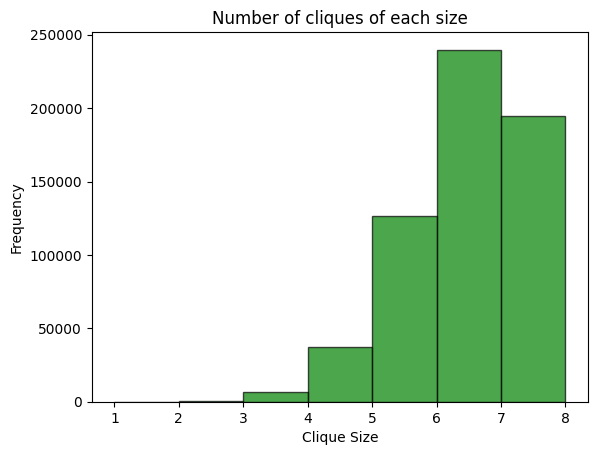

In [34]:
clique=find_clique(n,k)
print(clique)

plt.hist(clique.keys(),weights=clique.values(),bins=k,edgecolor='black',color='green',alpha=0.7)
plt.xlabel("Clique Size")
plt.ylabel("Frequency")
plt.title("Number of cliques of each size")
plt.show()

Identify the main communities in the graphs generated

In [36]:
import networkx as nx
import community.community_louvain as community_louvain


# Apply Louvain Community Detection
partition = community_louvain.best_partition(G)
print(partition)

# Group nodes by community
communities = {}
for node, comm in partition.items():
    communities.setdefault(comm, []).append(node)

print("Communities:", communities)


{1: 0, 10: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 9: 0, 11: 0, 12: 0, 13: 0, 14: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 37: 0, 38: 0, 39: 0, 40: 0, 8: 0, 15: 0, 22: 0, 29: 0, 36: 0}
Communities: {0: [1, 10, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 8, 15, 22, 29, 36]}


In [37]:
from networkx.algorithms.community import girvan_newman

com=list(girvan_newman(G))
com=list(com[0])
print(com)

[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}, {23}]


Generating the graphs and visualizing them with Network-x

2. (20,5)

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 7), (1, 8), (1, 9), (1, 10), (1, 12), (1, 13), (1, 14), (1, 15), (1, 17), (1, 18), (1, 19), (1, 20), (2, 3), (2, 4), (2, 5), (2, 6), (2, 8), (2, 9), (2, 10), (2, 11), (2, 13), (2, 14), (2, 15), (2, 16), (2, 18), (2, 19), (2, 20), (3, 4), (3, 5), (3, 6), (3, 7), (3, 9), (3, 10), (3, 11), (3, 12), (3, 14), (3, 15), (3, 16), (3, 17), (3, 19), (3, 20), (4, 5), (4, 6), (4, 7), (4, 8), (4, 10), (4, 11), (4, 12), (4, 13), (4, 15), (4, 16), (4, 17), (4, 18), (4, 20), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (5, 14), (5, 16), (5, 17), (5, 18), (5, 19), (6, 7), (6, 8), (6, 9), (6, 10), (6, 12), (6, 13), (6, 14), (6, 15), (6, 17), (6, 18), (6, 19), (6, 20), (7, 8), (7, 9), (7, 10), (7, 11), (7, 13), (7, 14), (7, 15), (7, 16), (7, 18), (7, 19), (7, 20), (8, 9), (8, 10), (8, 11), (8, 12), (8, 14), (8, 15), (8, 16), (8, 17), (8, 19), (8, 20), (9, 10), (9, 11), (9, 12), (9, 13), (9, 15), (9, 16), (9, 17), (9, 18), (9, 20), (10, 11), (10, 12), (10

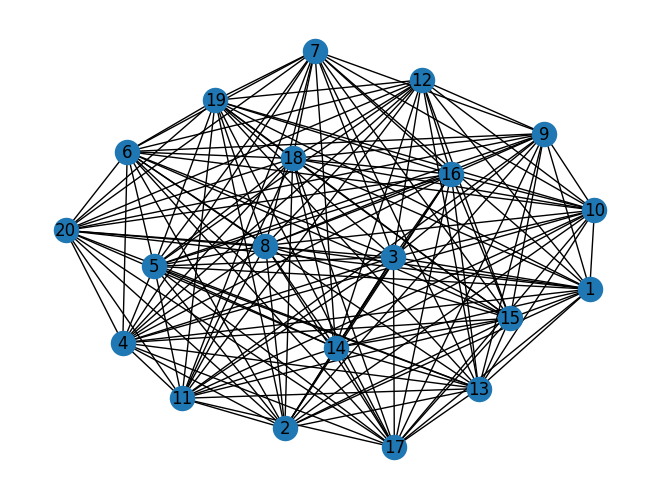

In [38]:
#2. (20,5)
n=20
k=5
edges_list,adj_list=graph_edges(n,k)
print(edges_list)
print("number of edges : ",len(edges_list))
print(adj_list)
df=pd.DataFrame(edges_list,columns=['Source','Target'])
df.to_csv("edges(20,5).csv",index=False)

G=nx.Graph()
G.add_nodes_from([1,10])
G.add_edges_from(edges_list)
nx.draw(G,with_labels=True)

calculate the number of edges present in it & compare it with the approximation offered by the fraction(k-1)/k for the following values of n & k

In [39]:
possible_edges=n*(n-1)/2
present_edges=len(edges_list)
print("total possible edges : " ,possible_edges)
print("number of present edges : ",present_edges)
print()
print("Fraction of Present Edges : " , present_edges/possible_edges)
print("approximation offered by the fraction (k-1)/k : ",(k-1)/k)

total possible edges :  190.0
number of present edges :  160

Fraction of Present Edges :  0.8421052631578947
approximation offered by the fraction (k-1)/k :  0.8


 Count the number of cliques of each size... Plot their histograms

{1: 20.0, 2: 160.0, 3: 640.0, 4: 1280.0, 5: 1024.0, 6: 0}


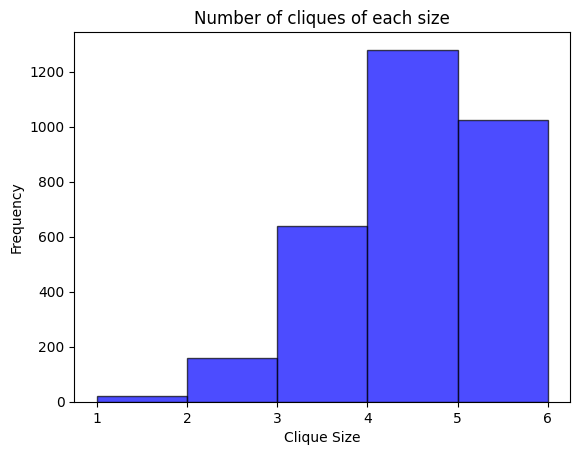

In [40]:
clique=find_clique(n,k)
print(clique)

plt.hist(clique.keys(),weights=clique.values(),bins=k,edgecolor='black',color='blue',alpha=0.7)
plt.xlabel("Clique Size")
plt.ylabel("Frequency")
plt.title("Number of cliques of each size")
plt.show()

Identify the main communities in the graphs generated

In [41]:
import networkx as nx
import community.community_louvain as community_louvain


# Apply Louvain Community Detection
partition = community_louvain.best_partition(G)
print(partition)

# Group nodes by community
communities = {}
for node, comm in partition.items():
    communities.setdefault(comm, []).append(node)

print("Communities:", communities)


{1: 2, 10: 2, 2: 2, 3: 3, 4: 3, 5: 1, 7: 1, 8: 2, 9: 0, 12: 0, 13: 1, 14: 2, 15: 0, 17: 3, 18: 0, 19: 1, 20: 3, 6: 0, 11: 1, 16: 3}
Communities: {2: [1, 10, 2, 8, 14], 3: [3, 4, 17, 20, 16], 1: [5, 7, 13, 19, 11], 0: [9, 12, 15, 18, 6]}


In [42]:
from networkx.algorithms.community import girvan_newman

com=list(girvan_newman(G))
com=list(com[0])
print(com)

[{1}, {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}]


Thus, the fraction of edges that actually exist in the graph is approximately:
 (k-1)/k

This means that, as k increases, the graph becomes denser because fewer edges are forbidden. Conversely, when k is small, more edges are removed, making the graph sparser